# Importing Necessary Libraries
Plotting Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import copy
%matplotlib inline

In [2]:
#Metrics for Classification technique
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold,cross_val_score

#Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

#Model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Data Loading

Importing Data

In [3]:
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data.head(6) # Mention no of rows to be displayed from the top in the argument

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0


Dataset description


This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
3. Chest Pain Type: Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic (Nominal)
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numeric)
6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. resting ecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. max heart rate: Maximum heart rate achieved (Numeric)
9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

Target variable

12. target: It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.

# Exploratory Data Analysis
1. Understanding Dataset and its shape

In [4]:
data.shape

(1190, 12)

Inference: We have a dataset with 1190 rows which indicates a smaller set of data.

2. Checking the datatype of each column

In [5]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

Inference: The inference we can derive from the above output is:

Out of 12 features, we have 11 int types and only one with the float data types.

3. Categorical and Numerical Column.

Inference : The datatype of all columns are Numerical.

4. Checking Missing Values

In [6]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

There is no missing values in the dataset. 

# STATISTICAL SUMMARY

5. Statistical summary of data

In [7]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Skewness=>

Positively skewed data (mean>median) 5 columns

resting bp s, fasting blood sugar, resting ecg, excercise angina, old peak

Negatively skewed data (mean<median) 7 column

age, sex, chest pain type, cholesterol, max heart rate, ST slope, target



Inference:- The dataset contains more Negatively skewed data.

6. Check the correlation between various features. - CORRELATION MATRIX

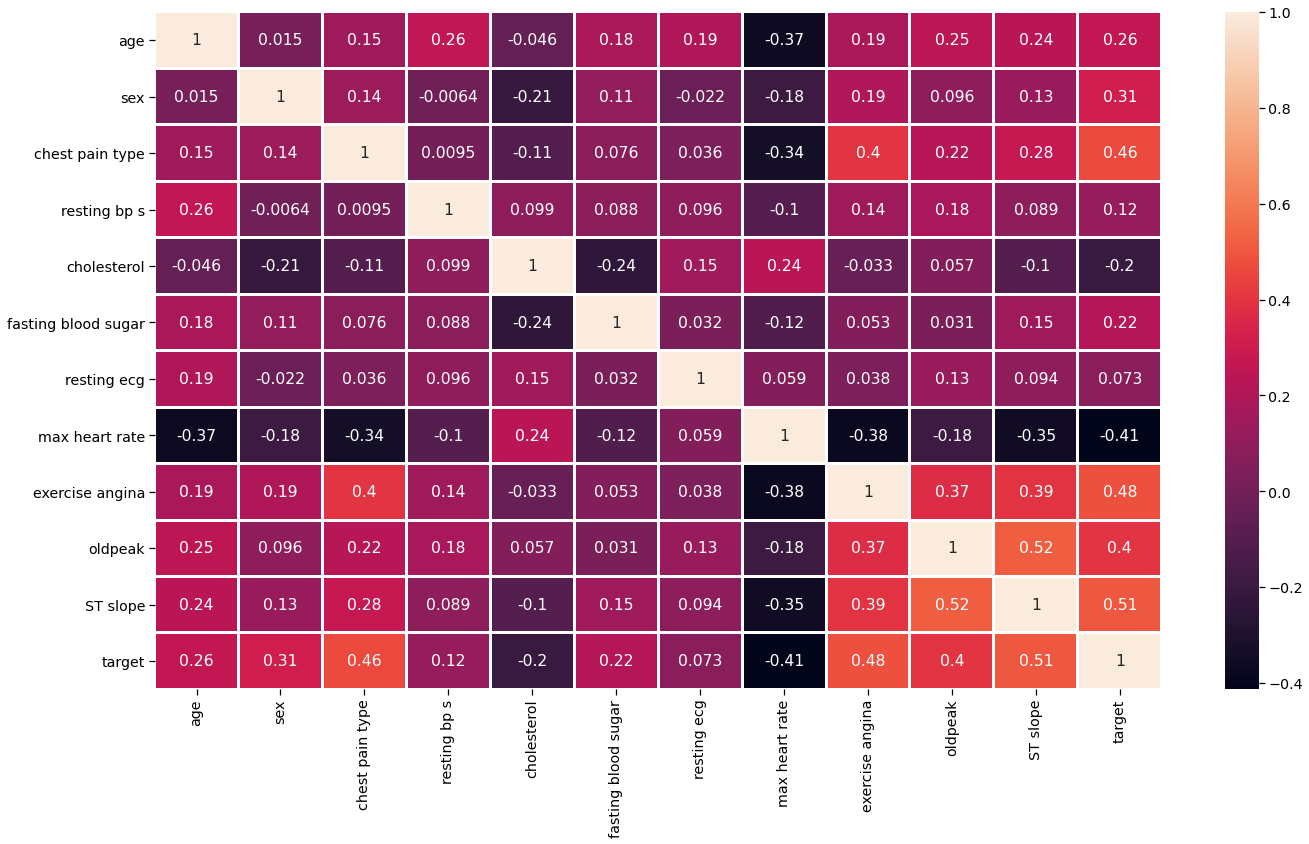

In [8]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

Check the correlation of the target variable.

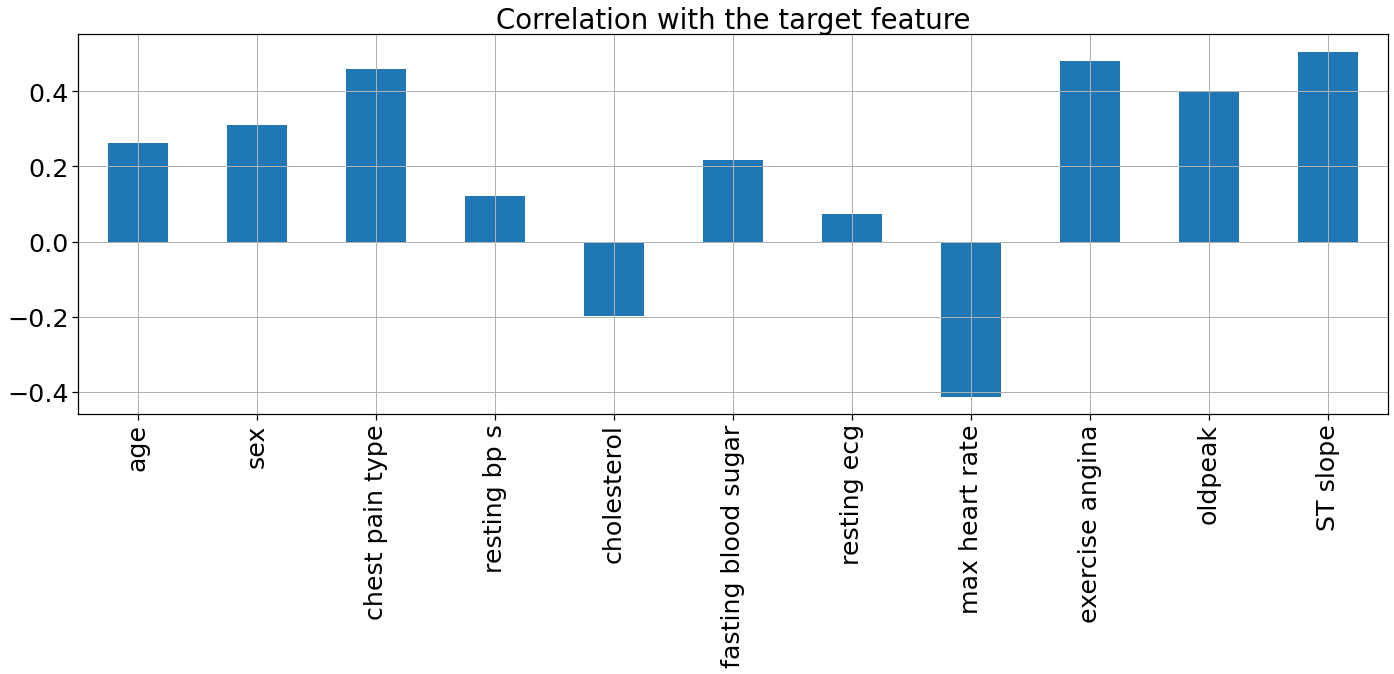

In [9]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

Inference: Insights from the above graph are:

1. Two features( “cholesterol”, “max heart rate” ) are negatively correlated with the target feature.
2. Other features are positively correlated with the target feature.

# Analysis of the individual features which comprises both univariate and bivariate analysis.

In [10]:
dt=data.copy()

In [11]:
# converting features to categorical features 

dt['chest pain type'][dt['chest pain type'] == 1] = 'typical angina'
dt['chest pain type'][dt['chest pain type'] == 2] = 'atypical angina'
dt['chest pain type'][dt['chest pain type'] == 3] = 'non-anginal pain'
dt['chest pain type'][dt['chest pain type'] == 4] = 'asymptomatic'



dt['resting ecg'][dt['resting ecg'] == 0] = 'normal'
dt['resting ecg'][dt['resting ecg'] == 1] = 'ST-T wave abnormality'
dt['resting ecg'][dt['resting ecg'] == 2] = 'left ventricular hypertrophy'


dt['ST slope'][dt['ST slope'] == 0] = 'normal'
dt['ST slope'][dt['ST slope'] == 1] = 'upsloping'
dt['ST slope'][dt['ST slope'] == 2] = 'flat'
dt['ST slope'][dt['ST slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

<ipython-input-11-60b654dfa575>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['chest pain type'][dt['chest pain type'] == 1] = 'typical angina'
<ipython-input-11-60b654dfa575>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['resting ecg'][dt['resting ecg'] == 0] = 'normal'
<ipython-input-11-60b654dfa575>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ST slope'][dt['ST slope'] == 0] = 'normal'


In [12]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [13]:
dt

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,male,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,female,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


# Age(“age”) Analysis
Here we will be checking the 10 ages and their counts.

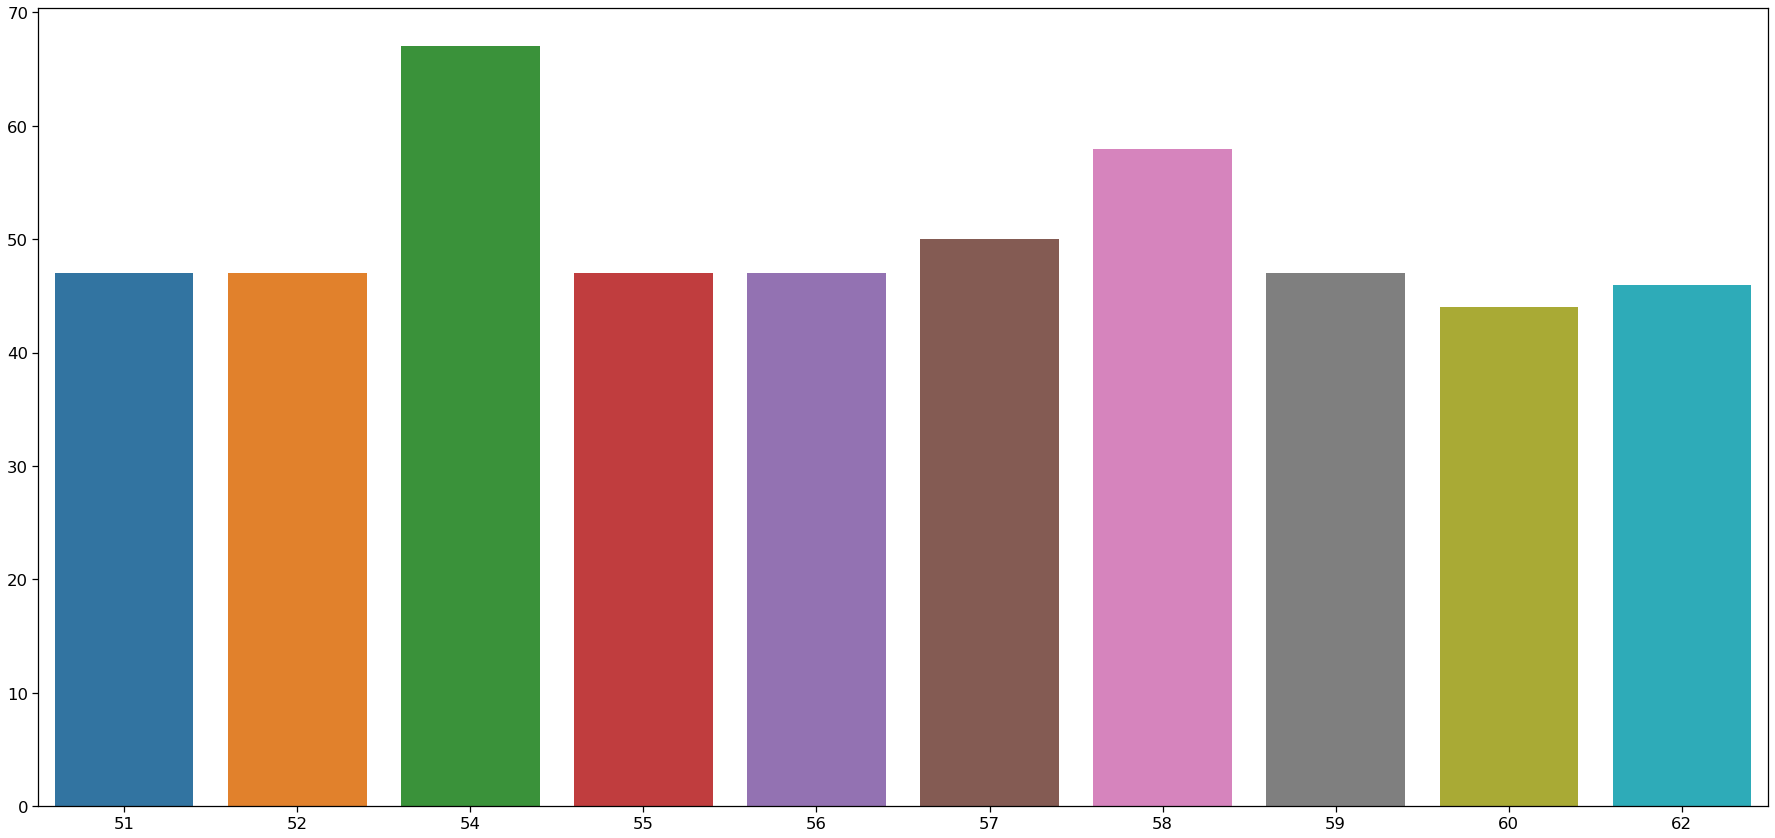

In [14]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=dt.age.value_counts()[:10].index,y=dt.age.value_counts()[:10].values)
plt.tight_layout()

Inference:  Here we can see that the 54 age column has the highest frequency.

Check the range of age in the dataset.

In [15]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 28
Max Age : 77
Mean Age : 53.72016806722689


We should divide the Age feature into three parts – “Young”, “Middle” and “Elder”

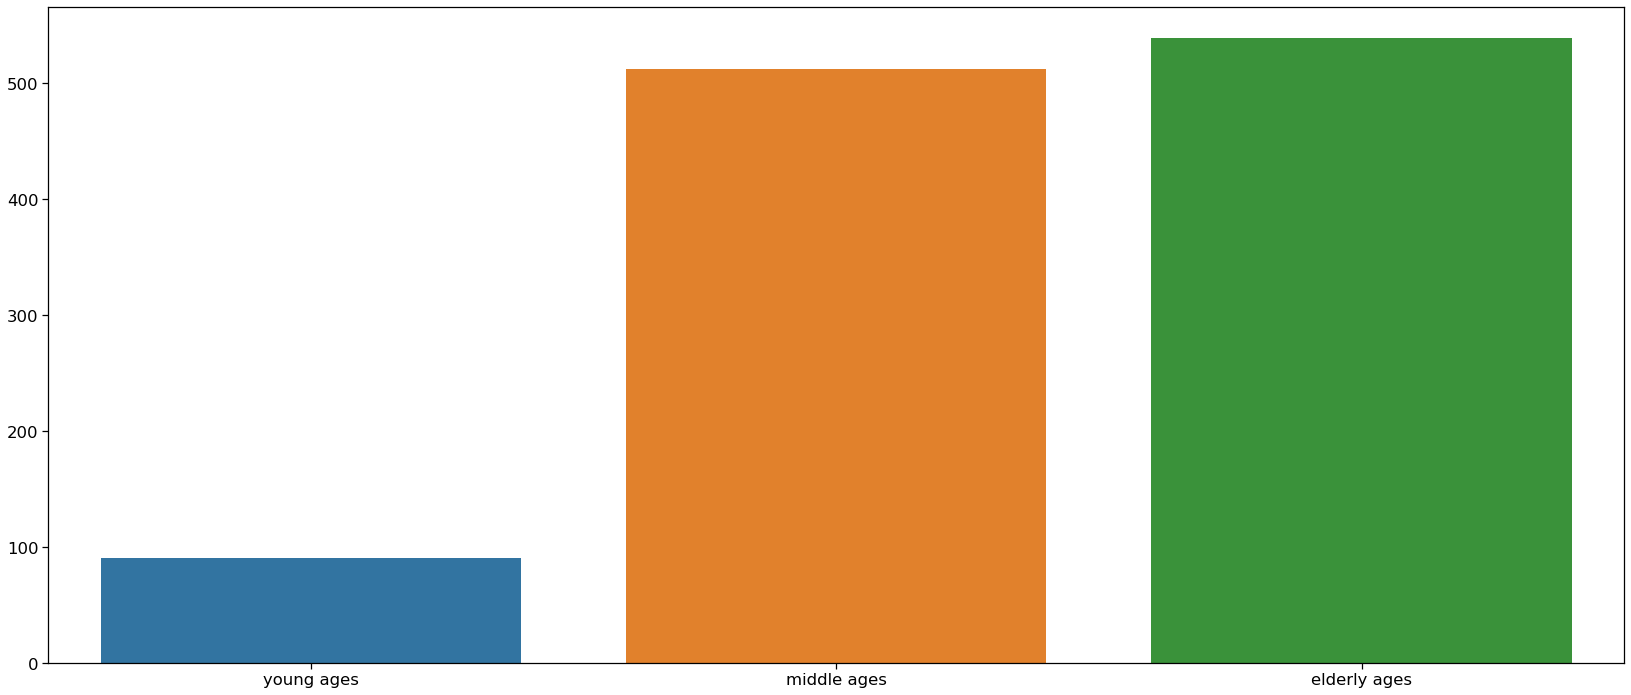

In [16]:
Young = dt[(dt.age>=29)&(dt.age<40)]
Middle = dt[(dt.age>=40)&(dt.age<55)]
Elder = dt[(dt.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

Inference: Here we can see that elder people are the most affected by heart disease and young ones are the least affected.

To prove the above inference we will plot the pie chart.

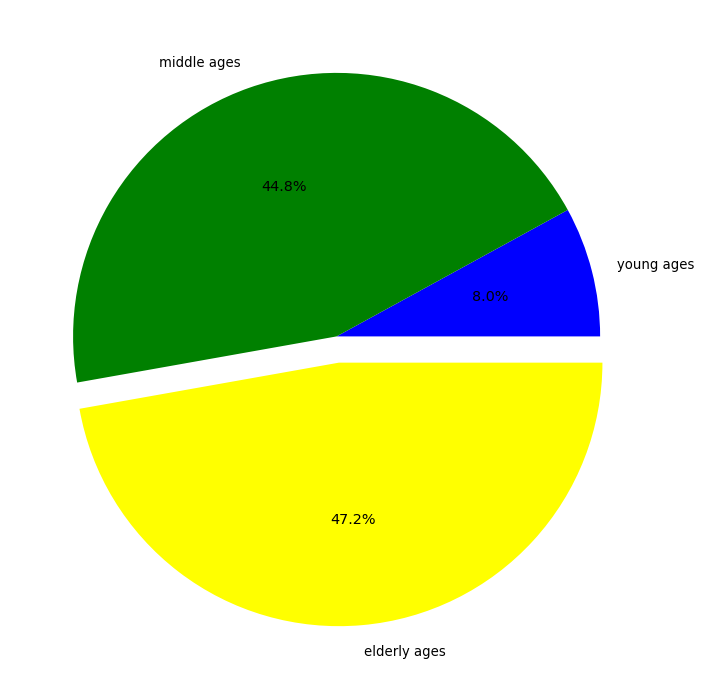

In [17]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


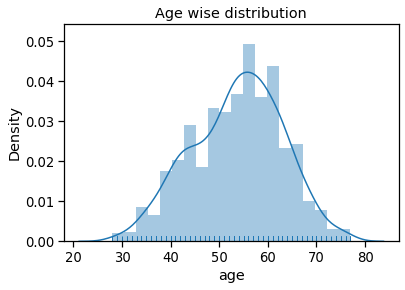

In [18]:
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

# Sex(“sex”) Feature Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


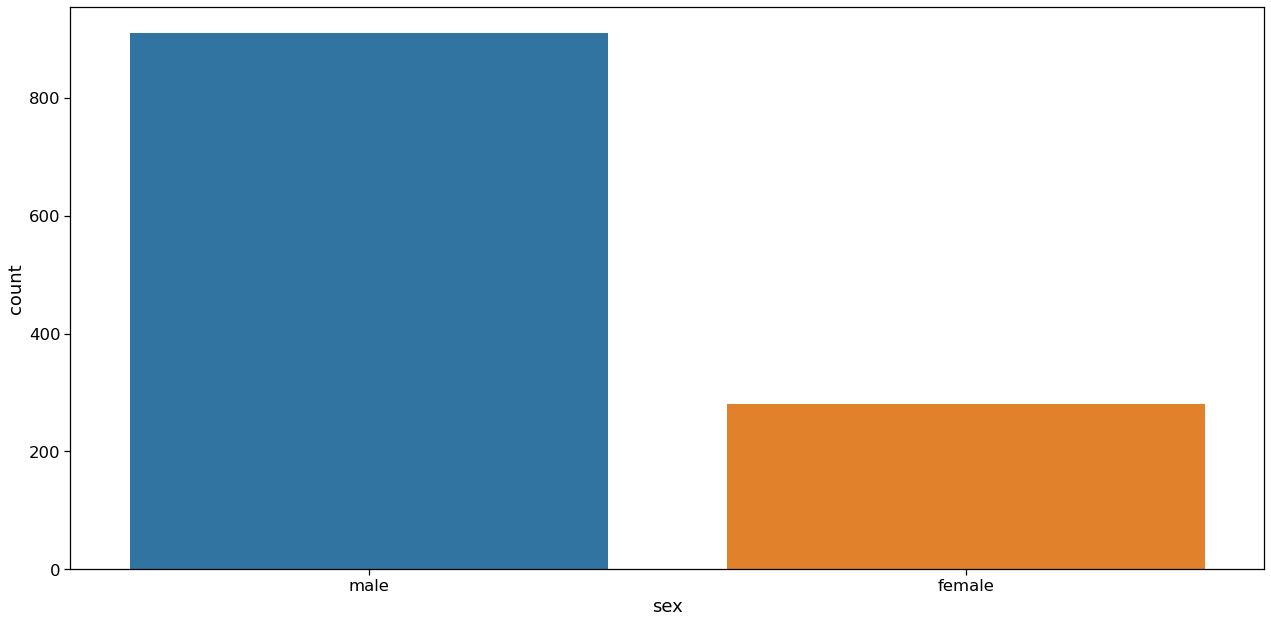

In [19]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dt['sex'])
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


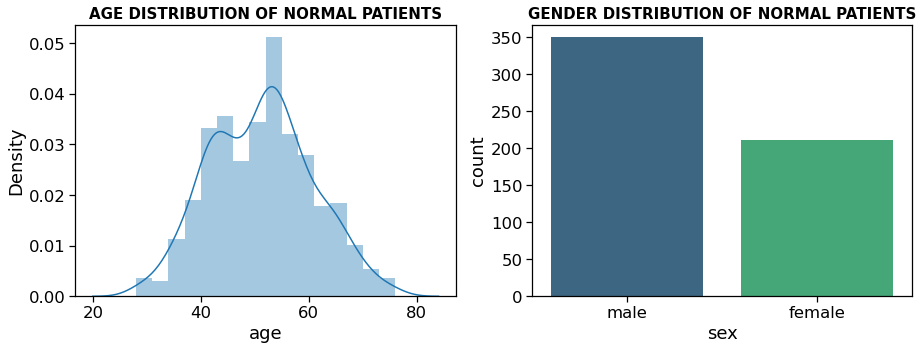

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


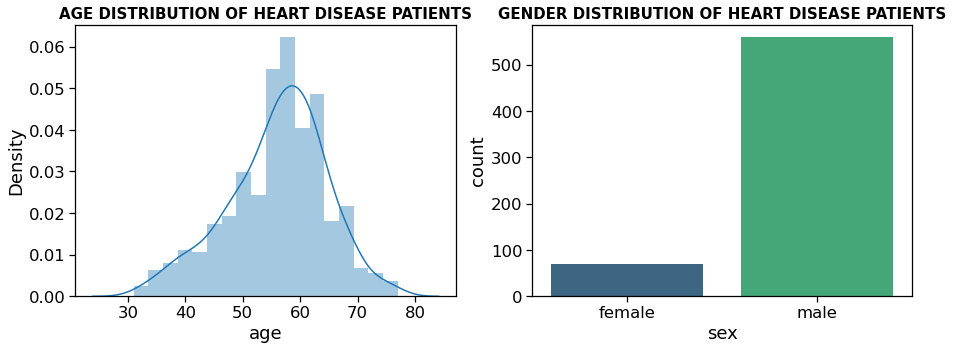

In [20]:
attr_1=dt[dt['target']==1]
attr_0=dt[dt['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()


Inference: Males(1) have higher cases compared to Females(0)

# Plot the relation between sex and slope.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


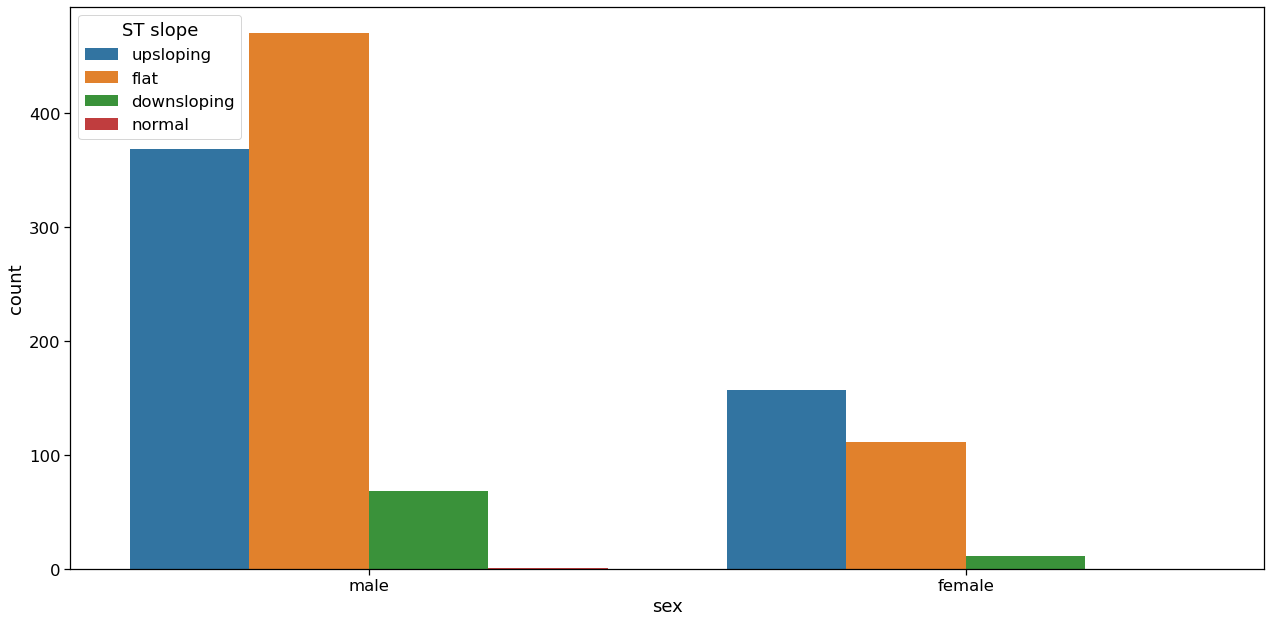

In [21]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dt['sex'],hue=dt["ST slope"])
plt.tight_layout()

Inference: Here it is clearly visible that the slope value is higher in the case of males(1).

# Chest Pain Type(“chest pain type”) Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


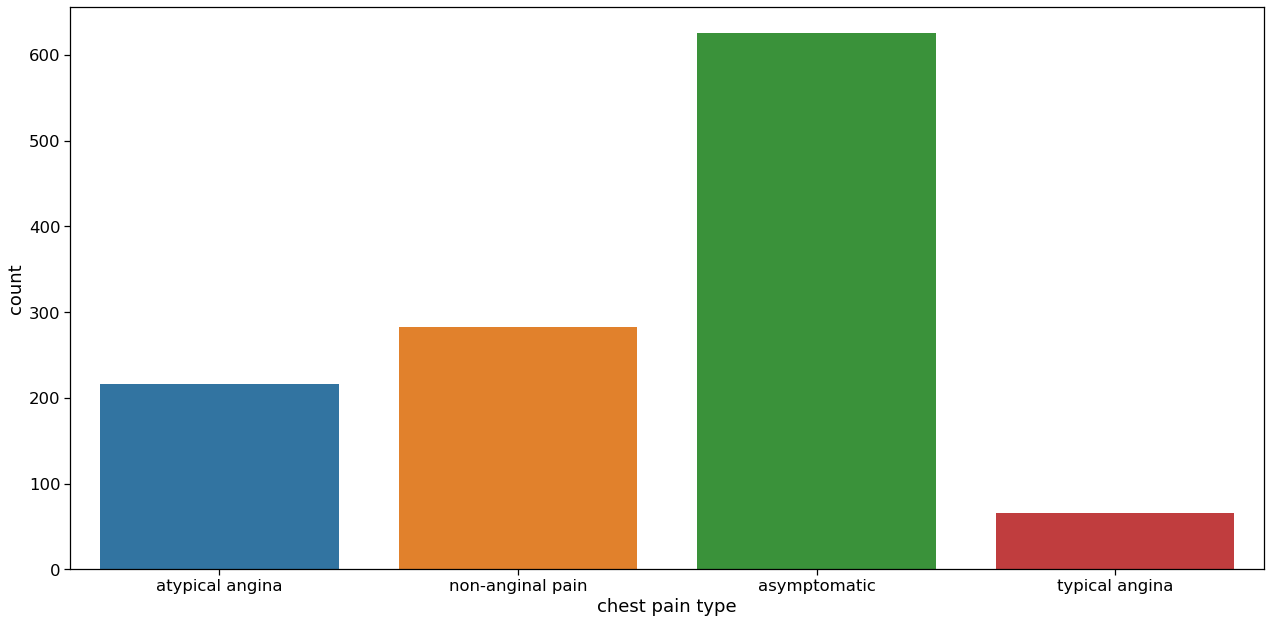

In [22]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dt['chest pain type'])
plt.tight_layout()

Inference: As seen, there are 4 types of chest pain

1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad

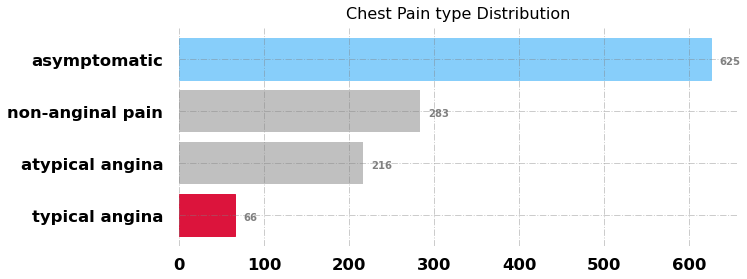

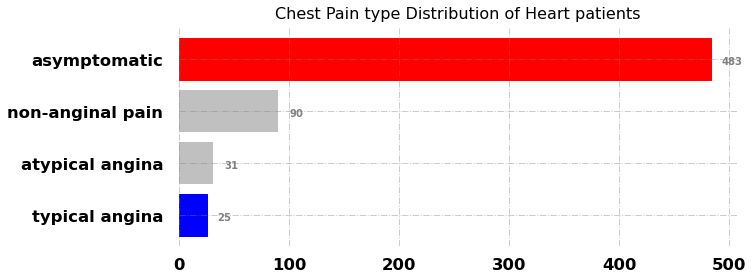

In [23]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt['chest pain type'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1['chest pain type'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

Analyzing chest pain type vs target column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


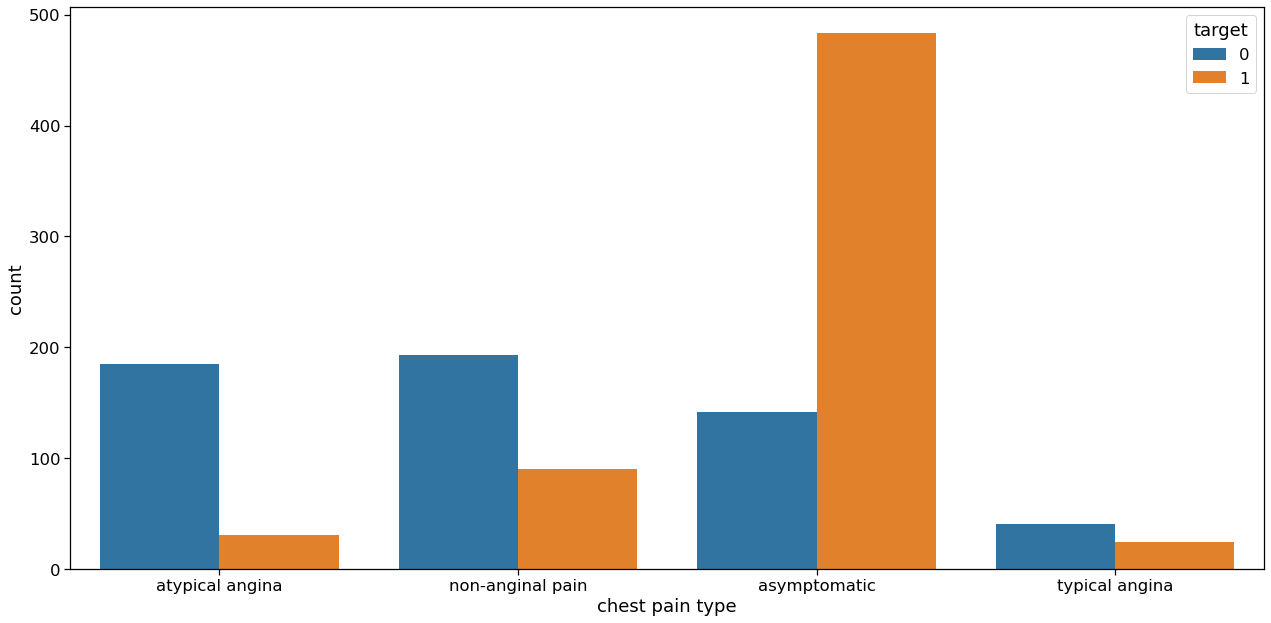

In [24]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dt['chest pain type'],hue=dt["target"])
plt.tight_layout()

Inference: From the above graph we can make some inferences,

People having the least chest pain are not likely to have heart disease.

People having severe chest pain are likely to have heart disease.

Elderly people are more likely to have chest pain.

# Fasting blood sugar Analysis

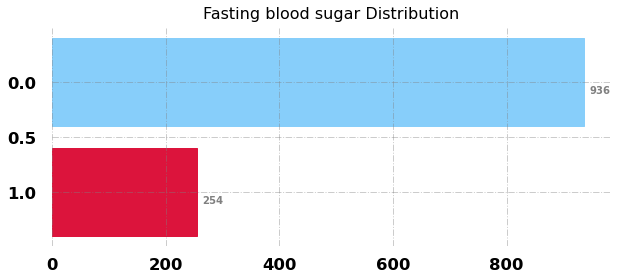

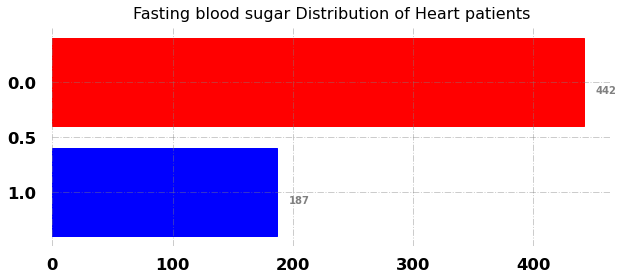

In [30]:

fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt['fasting blood sugar'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[1].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Fasting blood sugar Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1['fasting blood sugar'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[1].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Fasting blood sugar Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

# Resting ECG Analysis

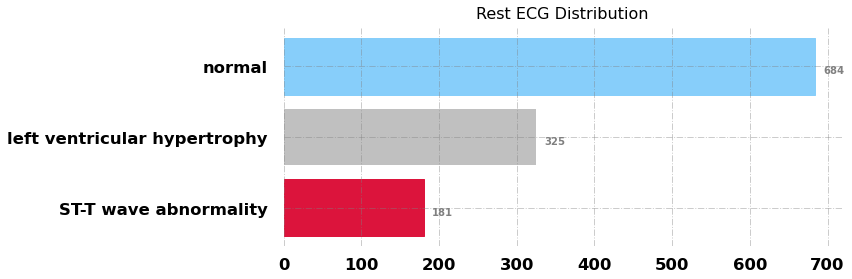

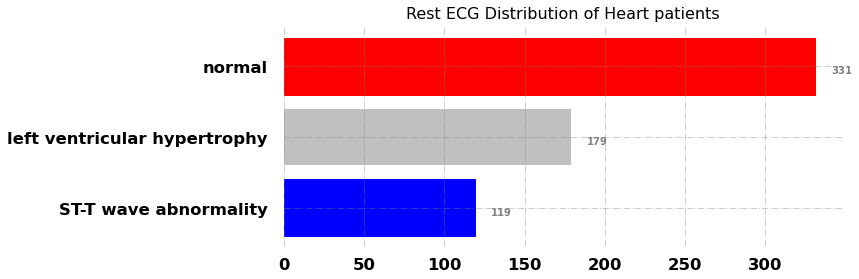

In [34]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt['resting ecg'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[2].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1['resting ecg'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


# ST Slope Analysis

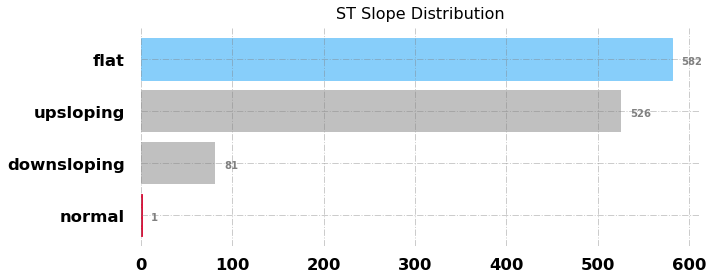

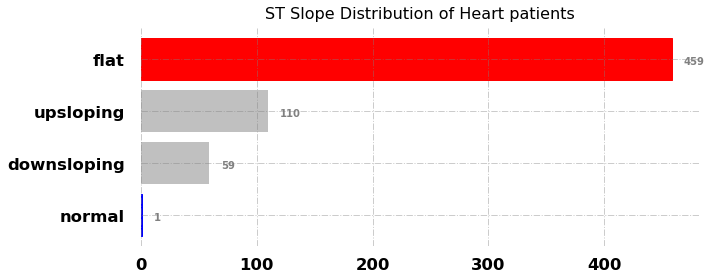

In [35]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt['ST slope'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1['ST slope'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

# Target Analysis

In [36]:
dt['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

In [37]:
dt.groupby('target').mean()

,age,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak
target,,,,,,,
0,51.124777,129.793226,231.657754,0.119430,150.894831,0.139037,0.464706
1,56.034976,134.259141,191.372019,0.297297,129.777424,0.608903,1.331320


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


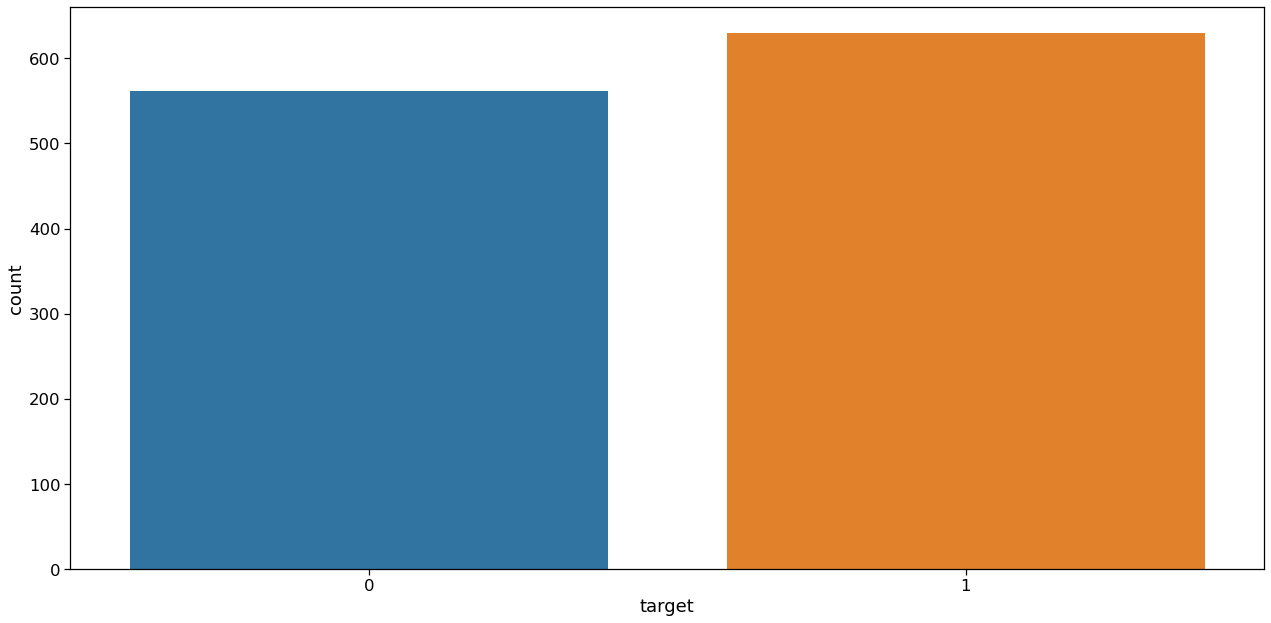

In [38]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dt['target'])
plt.tight_layout()

Inference: The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

# Feature Engineering

In [39]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
--------------------
sex : [1 0]
--------------------
chest pain type : [2 3 4 1]
--------------------
resting bp s : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
--------------------
cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292

Now here first we will be removing the target column from our set of features, 

then we will categorize all the categorical variables using the get dummies method which will create a separate column for each category suppose X variable contains 2 types of unique values,

then it will create 2 different columns for the X variable.

In [40]:
categorical_val.remove('target')
dfs = pd.get_dummies(data, columns = categorical_val)

dfs.head(6)

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex_0,sex_1,chest pain type_1,chest pain type_2,...,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,140,289,172,0.0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,49,160,180,156,1.0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,48,138,214,108,1.5,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5,39,120,339,170,0.0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


Now we will be using the standard scaler method to scale down the data so that it won’t raise the outliers also dataset which is scaled to general units leads to having better accuracy.



In [41]:
sc = StandardScaler()
col_to_scale = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex_0,sex_1,chest pain type_1,chest pain type_2,...,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,-1.466728,0.427328,0.775674,1.265039,-0.849792,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,-0.504600,1.516587,-0.299512,0.637758,0.071119,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-1.787437,-0.117301,0.716489,-1.636136,-0.849792,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,-0.611503,0.318402,0.035867,-1.244085,0.531575,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.029915,0.971958,-0.151550,-0.695214,-0.849792,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5,-1.573631,-0.661931,1.268878,1.186628,-0.849792,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


# DELETE SOME ROWS FOR TESTING

In [42]:
df_0=dfs.loc[dfs['target']==0].head(5)
df_1=dfs.loc[dfs['target']==1].head(5)

In [43]:
df_1

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex_0,sex_1,chest pain type_1,chest pain type_2,...,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
1,-0.504600,1.516587,-0.299512,0.637758,0.071119,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,-0.611503,0.318402,0.035867,-1.244085,0.531575,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8,-1.787437,0.427328,-0.033181,-0.381574,0.531575,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
11,0.457527,0.209476,-0.457337,-1.596931,0.992031,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
13,-0.504600,0.427328,0.233149,0.010477,0.071119,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [44]:
df_1 = df_1.drop([1])
dfs = dfs.drop([1])
dfs = dfs.drop([3])
dfs = dfs.drop([8])
dfs = dfs.drop([11])
dfs = dfs.drop([13])

dfs = dfs.drop([0])
dfs = dfs.drop([2])
dfs = dfs.drop([4])
dfs = dfs.drop([5])
dfs = dfs.drop([6])

In [45]:
frames=[df_0,df_1]

In [46]:
result=pd.concat(frames)

In [47]:
result

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex_0,sex_1,chest pain type_1,chest pain type_2,...,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,-1.466728,0.427328,0.775674,1.265039,-0.849792,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,-1.787437,-0.117301,0.716489,-1.636136,-0.849792,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
4,0.029915,0.971958,-0.151550,-0.695214,-0.849792,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5,-1.573631,-0.661931,1.268878,1.186628,-0.849792,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
6,-0.932213,-0.117301,0.262741,1.186628,-0.849792,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,-0.611503,0.318402,0.035867,-1.244085,0.531575,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8,-1.787437,0.427328,-0.033181,-0.381574,0.531575,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
11,0.457527,0.209476,-0.457337,-1.596931,0.992031,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
13,-0.504600,0.427328,0.233149,0.010477,0.071119,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [48]:
output=result['target']

In [49]:
output

0     0
2     0
4     0
5     0
6     0
3     1
8     1
11    1
13    1
Name: target, dtype: int64

In [50]:
result.drop('target',inplace=True,axis=1)

In [51]:
result

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex_0,sex_1,chest pain type_1,chest pain type_2,chest pain type_3,...,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,-1.466728,0.427328,0.775674,1.265039,-0.849792,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,-1.787437,-0.117301,0.716489,-1.636136,-0.849792,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0.029915,0.971958,-0.151550,-0.695214,-0.849792,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
5,-1.573631,-0.661931,1.268878,1.186628,-0.849792,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
6,-0.932213,-0.117301,0.262741,1.186628,-0.849792,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,-0.611503,0.318402,0.035867,-1.244085,0.531575,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8,-1.787437,0.427328,-0.033181,-0.381574,0.531575,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
11,0.457527,0.209476,-0.457337,-1.596931,0.992031,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
13,-0.504600,0.427328,0.233149,0.010477,0.071119,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Modeling

Splitting our Dataset

In [52]:
X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The KNN Machine Learning Algorithm

In [53]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.8615819209039548


# The Random Forest Machine Learning Algorithm

In [54]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred2))



0.8757062146892656


# The Decision Tree Machine Learning Algorithm

In [55]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
y_pred3 = dt.predict(X_test)
print(accuracy_score(y_test,y_pred3))





0.8559322033898306


# Conclusion on Heart Attack Prediction

1. We did data visualization and data analysis of the target variable, age features, and whatnot along with its univariate analysis and bivariate analysis.

2. We also did a complete feature engineering part in this article which summons all the valid steps needed for further steps i.e.
model building.

3. From the above model accuracy, RandomForest is giving us the accuracy which is 89%.

# RANDOM FOREST MODEL

# MODEL EVALUATION

# 1. ACCURACY

In [56]:
print('RF Train_data : ',rf.score(X_train,y_train))
print('RF Validation Data : ', rf.score(X_test,y_test))

RF Train_data :  0.847457627118644
RF Validation Data :  0.8757062146892656


In [57]:
y_pred2

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

# 2. CONFUSION MATRIX

In [58]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_pred2))

confusion=confusion_matrix(y_test, y_pred2)

Confusion Matrix : 
[[134  31]
 [ 13 176]]


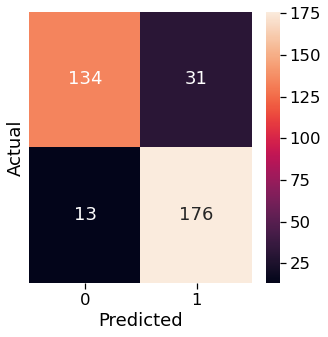

In [59]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion, annot=True, fmt='d',
            xticklabels=1, yticklabels=0)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 3. CLASSIFICATION REPORT

In [60]:
print('Classification Report : ')
print(classification_report(y_test, y_pred2))

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       165
           1       0.85      0.93      0.89       189

    accuracy                           0.88       354
   macro avg       0.88      0.87      0.87       354
weighted avg       0.88      0.88      0.87       354



# SAVE THE MODEL

In [61]:
import pickle

pickle.dump(rf,open(r"RFClassifier",'wb'))

# BUILDING PREDICTIVE SYSTEM

Load the model From the disc

In [62]:
import pickle
loaded_model = pickle.load(open(r"RFClassifier",'rb'))

In [63]:
y_pred = loaded_model.predict(result)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [64]:
y_predicted = []
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_predicted.append("Normal")
    
    else:
        y_predicted.append("Risk")

# PREDICTED VALUES

In [65]:
y_predicted

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Risk',
 'Risk',
 'Risk',
 'Risk']

# ACTUAL VALUES

In [66]:
out_list=output.values.tolist()
out=[]
for i in range(len(out_list)):
    if out_list[i] == 0:
        out.append("Normal")
    
    else:
        out.append("Risk")
out

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Risk',
 'Risk',
 'Risk',
 'Risk']